# Початок роботи з бібліотекою OpenCV

У даній лабораторній роботі розглянуто наступний функціонал бібліотеки OpenCV:
1. Зчитування, запис та відображення зображень.
2. Визначення параметрів зображення - розмір, канали, колір.
3. Доступ до окремих пікселів та робота з групою пікселів.

## Імпорт бібліотек та пакетів

Завантажуємо бібліотеку OpenCV.

In [1]:
import cv2

OpenCV завантажує зображення у вигляді багатомірних масивів та матриць.
Для операції з багатомірними масивами і матрицями імпортуємо бібліотеку NumPy.

In [2]:
import numpy as np

Імпортуємо функцію pyplot з бібліотеки Matplotlib для відображення зображень.

In [3]:
import matplotlib.pyplot as plt

## Зчитування зображень

Для зчитування зображення з диску використовується функція **imread**. Дана функція завантажує зображення із зазначеного файла та повертає масив даних. У випадку коли файл із зображенням відсутній функція повертає **None**. Функція **imread** підтримує більшість відомих форматів зображень (PNG, BMP, JPG).

### Синтаксис функції
    retval = cv2.imread(filename [, flags])
Параметри:
* **filename** - відносний або абсолютний шлях до файла із зображенням. Обовязковий параметр.<br>
* **flags** - даний параметр визначає формат зчитування зображення:<br>
    * cv2.IMREAD_COLOR - зчитування кольорового зображення;
    * cv2.IMREAD_GRAYSCALE - зчитування зображення у відтінках сірого;
    * cv2.IMREAD_UNCHANGED - зчитування зображення без змін при наявності альфа-каналу.


In [4]:
img_bw = cv2.imread("./examples/1_8.png", cv2.IMREAD_GRAYSCALE)

Надрукуємо масив **img**.

In [5]:
print(img_bw)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  13  13   0   0   0   0   0   0   0]
 [  0   0   0   0   0 128 244 255 255 244 131   0   0   0   0   0]
 [  0   0   0   0  86 255 170  36  35 173 255  85   0   0   0   0]
 [  0   0   0   3 143 255   0   0   0   0 255 130   0   0   0   0]
 [  0   0   0   0 122 255   0   0   0   0 255 120   0   0   0   0]
 [  0   0   0   0  38 223 183  44  45 182 223  39   0   0   0   0]
 [  0   0   0   0   0  82 255 235 234 253  79   0   0   0   0   0]
 [  0   0   0   0  91 255  99  34  33  94 255  89   0   0   0   0]
 [  0   0   0  15 214 168   0   0   0   0 166 208  14   0   0   0]
 [  0   0   0  18 235 140   0   0   0   0 138 230  18   0   0   0]
 [  0   0   0   7 170 244  52   0   0  49 245 163   6   0   0   0]
 [  0   0   0   0  41 232 247 211 211 245 235  44   0   0   0   0]
 [  0   0   0   0   0  11  66 136 135  67  11   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

Зображення завантажене у сірих відтінках представлене двухмірним масивом. Кожний елемент масиву - це значення інтенсивності окрмеого піксела. **0** - мінімальне значення інтенсивності, **255** - максимальне значення інтенсивності.

<h2>Відображення зображень</h2>

### OpenCV
Для відображення зображень за допомогою OpenCV використовується функція **imshow**. Данна функція використовується для відображення зображень при запуску сценаріїв Python у командній консолі.

### Синтаксис функції
    cv2.imshow(winname, mat)
Параметри:<br>
* **winname** - назва вікна.<br><br>
* **mat** - зображення.<br>

Приклад використання функції **imshow** при запуску сценарія Python у командній консолі:

Відображення зображення в окремому вікні<br>
<code>cv2.imshow("Image", img)</code><br>
Зачекати допоки користувач натисне кнопку для виходу з режиму відображення<br>
<code>cv2.waitKey(0)</code><br>
Знищення вікна<br>
<code>cv2.destroyAllWindows()</code>


### Matplotlib
Для відображення зображень за допомогою Matplotlib використовується функція **plt.imshow**. Данна функція використовуєтсья для відображення зображень у робочому середовищі Jupyter Notebook.

### Синтаксис функції
    plt.imshow(mat, cmap=None)
Параметри:<br>
* **mat** - зображення.
* **cmap** - тип колірної моделі Matplotlib.

Приклад використання функції **plt.imshow**:

In [26]:
# Створити робоче вікно із заданим розміром
plt.figure(figsize=(5, 5))

# Відобразити зображення
plt.imshow(img_bw, cmap='gray')

# Показати робоче вікно
plt.show();

NameError: name 'img_bw' is not defined

<Figure size 360x360 with 0 Axes>

## Зчитування та відображення кольрового зображення

Завантаження кольрового зображення.

In [7]:
img = cv2.imread("./examples/rgb.png")

За замовчуванням OpenCV завантажує кольорові зображення у форматі **BGR**. Проте функція пакету **plt.imshow** очікує зображення у форматі **RGB**. Для корректного відображення формат завантаженого зображення необхдіно перетворити з BGR в RGB. Для цього використовують функцію OpenCV **cvtColor**.

### Синтаксис функції
    dst = cv2.cvtColor(src, code [, dst[, dstCn]])
Параметри:

* **src** - вхідне зображення.
* **code** - код перетворення колірних моделей.

Приклад використання функції **cv2.cvtColor**:

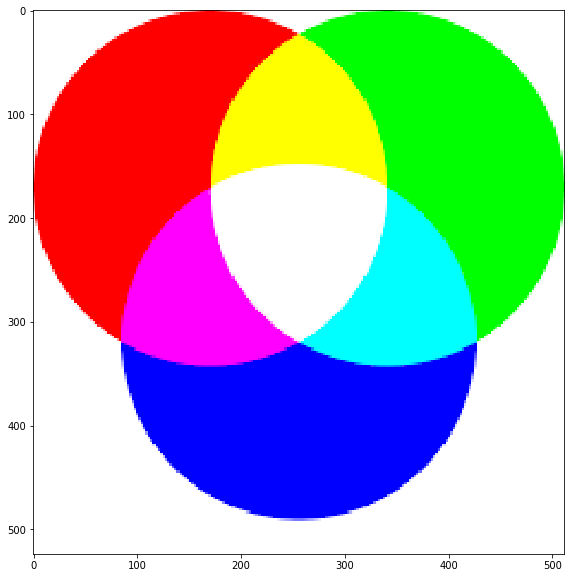

In [8]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.show();

Для спрощення попередній код можна переписати наступним чином:

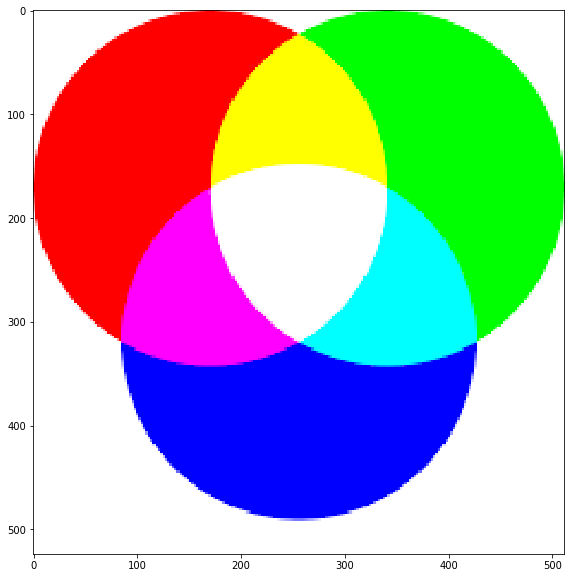

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show();

## Параметри зображень
Основними параметрами зображення при використанні OpenCV є розмір зображення та кількість каналів, тип данних та тип обєкут якими представлено зображення.
Визначимо розміри чорно-білого зображення:

In [10]:
img_bw.shape

(16, 16)

Дане чорно-біле зображення має наступні параметри:
* висота - 16 пікселів
* ширина - 16 пікселів

Визначимо розміри кольрового зображення:

In [11]:
img.shape

(524, 512, 3)

Дане кольорове зображення має наступні параметри:
* висота - 524 пікселів
* ширина - 512 піксіелв
* кількість каналів - 3

Визначимо яким типом данних представлені значення інтенсивності окремих пікселів чорно-білого та кольорового зображення:

In [12]:
print("Type = %s"%(img_bw.dtype))
print("Type = %s"%(img.dtype))

Type = uint8
Type = uint8


Визначимо яким типом данних представлено чорно-біле та кольорове зображення:

In [13]:
print("Type = %s"%type(img_bw))
print("Type = %s"%type(img))

Type = <type 'numpy.ndarray'>
Type = <type 'numpy.ndarray'>


## Доступ до окремих та груп пікселів.

### Доступ до окремих та групи пікселів
Для отримання доступу до значення інтенсивності окремого пікселя необхдіно використати відоповідні індекси. Наприклад, для чорно-білого зображення отримаємо значення інтенсивності пікселів з координатами (0, 0), (7, 7), (15, 15):

In [14]:
# (0,0)
print(img_bw[0, 0])

# (7, 7)
print(img_bw[int(img_bw.shape[0] / 2 - 1), int(img_bw.shape[1] / 2 - 1)])

# (15, 15)
print(img_bw[int(img_bw.shape[0] - 1), int(img_bw.shape[1] - 1)])

0
235
0


Для кольорового зображення отримаємо значення інтенсивності пікселів із координатами (0, 0), (261, 255), (523, 511):

In [15]:
# (0, 0)
print(img_rgb[0, 0])

# (261, 255)
print(img[int(img_rgb.shape[0] / 2 - 1), int(img_rgb.shape[1] / 2 - 1)])

# (523, 511)
print(img_rgb[int(img_rgb.shape[0] - 1), int(img_rgb.shape[1] - 1)])

[255 255 255]
[255 255 255]
[255 255 255]


Також, для кольорового зображення, отримаємо значення інтенсивності пікселів з відомими кольорами - червоний, зелений, синій:

In [16]:
# піксель з червоним кольором
print(img_rgb[100,100])

# піксель з зеленим кольором
print(img_rgb[100, 400])

# піксель з синім кольором
print(img_rgb[400, 250])

[255   0   0]
[  0 255   0]
[  0   0 255]



## Доступ до групи пікселів

Для доступа до групи пікселів використовують пари матричних індексів для завдання необхдіних діапазонів:

[[  0 128 244 255 255 244 131   0]
 [ 86 255 170  36  35 173 255  85]
 [143 255   0   0   0   0 255 130]
 [122 255   0   0   0   0 255 120]
 [ 38 223 183  44  45 182 223  39]
 [  0  82 255 235 234 253  79   0]]


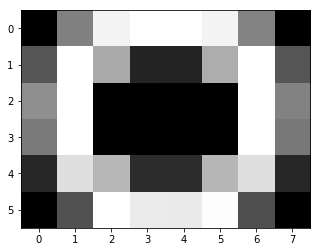

In [17]:
img_crop_bw = img_bw[2:8, 4:12]
print(img_crop_bw)
plt.imshow(img_crop_bw, cmap='gray')
plt.show()

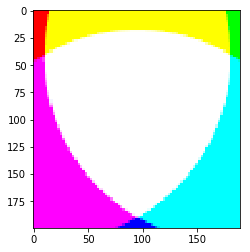

In [18]:
img_crop_rgb = img_rgb[130:330, 160:350]
plt.imshow(img_crop_rgb)
plt.show()

### Доступ до окремих колірних каналів кольрового зображення

Щоб отримати доступ до окремого колірного каналу зображення необхідно використати відповідний матричний індекс.

Приклад доступу до окремих колірних каналів за допомогою індекса:

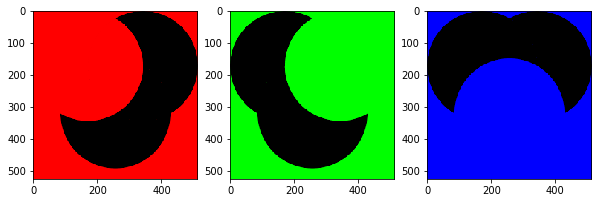

In [19]:
plt.figure(figsize=(10, 10))

plt.subplot(131);
R = np.zeros(img_rgb.shape, dtype='uint8')
R[:, :, 0] = img_rgb[:, :, 0]
plt.imshow(R)

plt.subplot(132);
G = np.zeros(img_rgb.shape, dtype='uint8')
G[:, :, 1] = img_rgb[:, :, 1]
plt.imshow(G)

plt.subplot(133);
B = np.zeros(img_rgb.shape, dtype='uint8')
B[:, :, 2] = img_rgb[:, :, 2]
plt.imshow(B)

plt.show()

Після того як всі необхідні операції з окремими колірними каналами виконано, їх можна обєданти за допомогою функції **cv2.merge**. Ця функція обєдную декілька окремих матриць однакового розміру в один багатовимірний масив.

### Синтаксис функції
    dst = cv2.merge(mv[, dst])
Параметри:

* **mv** - вектор масивів, якими представлено колірні канали.

In [20]:
# встановимо всі значення інтенсивності синього каналу рівними 0
B[:, :, 2] = 0

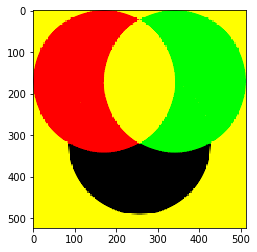

In [21]:
img_merge = cv2.merge((R[:, :, 0], G[:, :, 1], B[:, :, 2]))

plt.imshow(img_merge)
plt.show()

Також отримати доступ до окремих каналів можна за допомогою функції **split**. Дана функція розбиває зображення, як представлене багатомірним масивом на окремі масивів, які містять значення інтенсивності відповідних каналів.

### Синтаксис функції
    dst = cv2.split(img)
Параметри:

* **img** - вхідне зображення.

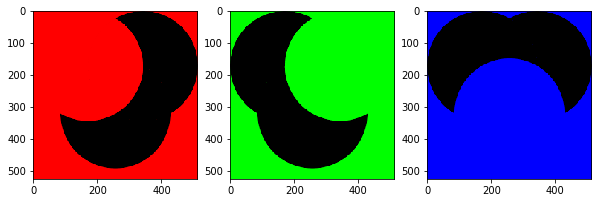

In [22]:
plt.figure(figsize=(10, 10))

b, g, r = cv2.split(img)
plt.subplot(131);
R = np.zeros(img_rgb.shape, dtype='uint8')
R[:, :, 0] = r
plt.imshow(R)

plt.subplot(132);
G = np.zeros(img_rgb.shape, dtype='uint8')
G[:, :, 1] = g
plt.imshow(G)

plt.subplot(133);
B = np.zeros(img_rgb.shape, dtype='uint8')
B[:, :, 2] = b
plt.imshow(B)

plt.show()

## Збереження зображень
Для збереження зображень за допомогою OpenCV використовується функція **imwrite**. Дана функція дозволяє задати імя вихідного файла в яке буде збережене вказане зображення.

### Синтаксис функції
    retval = cv2.imwrite(filename, img[, params])
Параметри:

* **filename** - імя вихідного файла.
* **img** - вхідне зображення.

In [23]:
cv2.imwrite("./examples/rgb_write.png", img)

True

# Завдання

GRAY:



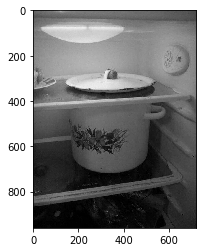

RGB:



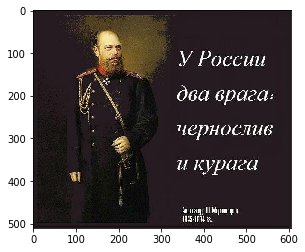

HSV:



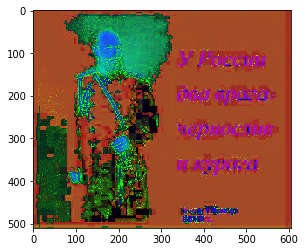

SEPARATE RGB CHANNELS:



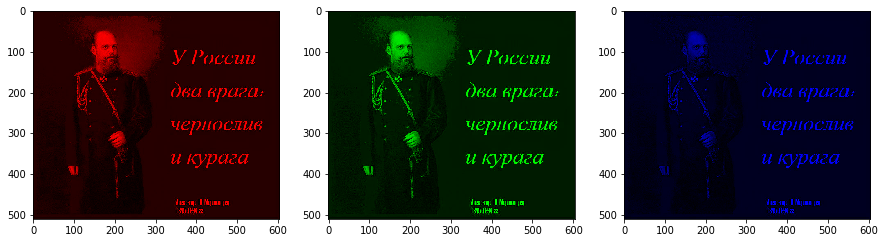

SEPARATE HSV CHANNELS:



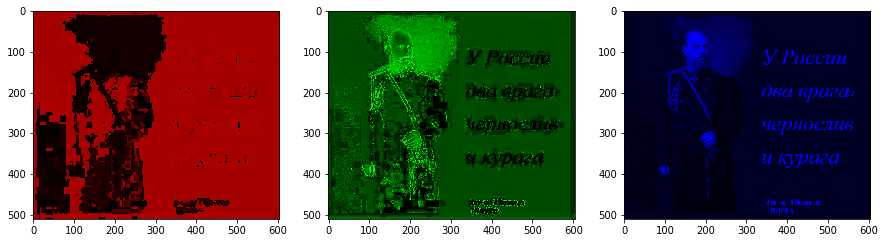

AREA OF INTEREST:


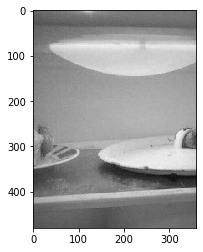

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
#---------------------------------------------------
img_gray=cv2.imread("./examples/pan.jpg")
plt.figure()
print("GRAY:\n")
plt.imshow(img_gray,cmap='gray')
plt.show()
#---------------------------------------------------
plt.figure()
img=cv2.imread("./examples/peacemaker).jpg")
img_RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print("RGB:\n")
plt.imshow(img_RGB)
plt.show()
#---------------------------------------------------
plt.figure()
img_HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
print("HSV:\n")
plt.imshow(img_HSV,cmap='hsv')
plt.show()
#---------------------------------------------------
print("SEPARATE RGB CHANNELS:\n")
plt.figure(figsize=(15,15))
r,g,b=cv2.split(img_RGB)
plt.subplot(131)
R=np.zeros(img_RGB.shape,dtype='uint8')
R[:,:,0]=r;
plt.imshow(R)

plt.subplot(132)
G=np.zeros(img_RGB.shape,dtype='uint8')
G[:,:,1]=g;
plt.imshow(G)

plt.subplot(133)
B=np.zeros(img_RGB.shape,dtype='uint8')
B[:,:,2]=b;
plt.imshow(B)
plt.show()
#---------------------------------------------------
print("SEPARATE HSV CHANNELS:\n")
plt.figure(figsize=(15,15))
h,s,v=cv2.split(img_HSV)
plt.subplot(131)
H=np.zeros(img_HSV.shape,dtype='uint8')
H[:,:,0]=h;
plt.imshow(H)

plt.subplot(132)
S=np.zeros(img_HSV.shape,dtype='uint8')
S[:,:,1]=s;
plt.imshow(S)

plt.subplot(133)
V=np.zeros(img_HSV.shape,dtype='uint8')
V[:,:,2]=v;
plt.imshow(V)
plt.show()
#---------------------------------------------------
print("AREA OF INTEREST:")
img_gray_crop=img_gray[0:int(img_gray.shape[0]/2),0:int(img_gray.shape[1]/2)]
cv2.imwrite("./examples/aoi.jpg",img_gray_crop)
plt.figure()
plt.imshow(img_gray_crop)
plt.show()

Extra task:
[0 0 0]


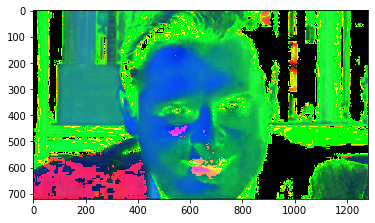

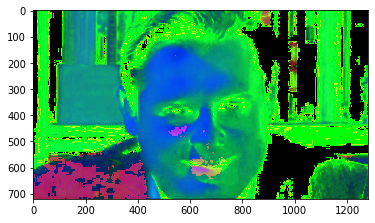

In [29]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

#https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html

print("Extra task:")
image=cv2.imread("./examples/ponasenkov.jpg")
image_RGB=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
plt.imshow(image_RGB)
def rgb2hsv(r,g,b):
    r,g,b=r/255.0,g/255.0,b/255.0
    
    cmax=max(r,g,b)
    cmin=min(r,g,b)
    delta=cmax-cmin
    #HUE
    if cmax==cmin:
        h=0
    elif cmax==r:
        h=60*(g-b)/delta
    elif cmax==g:
        h=60*((b-r)/delta)+120
    elif cmax==b:
        h=60*((r-g)/delta)+240
    #SATURATION
    if cmax==0:
        s=0
    else:
        s=(delta/cmax)*255
    #VALUE
    v=cmax*255
    return h,s,v
    
uu,zu,ku=rgb2hsv(100,14,54)
img_HSV=cv2.cvtColor(image_RGB,cv2.COLOR_RGB2HSV)
print(img_HSV[0][0][:])
image_HSV=np.zeros(image_RGB.shape,dtype='uint8')
for i in range(0,int(image_HSV.shape[0])):
    for j in range(0,int(image_HSV.shape[1])):
        h,s,v=rgb2hsv(image_RGB[i][j][0],image_RGB[i][j][1],image_RGB[i][j][2])
        image_HSV[i][j][0]=h
        image_HSV[i][j][1]=s
        image_HSV[i][j][2]=v
plt.imshow(image_HSV,cmap=plt.get_cmap('hsv'))
plt.figure()
plt.imshow(hsv)

In [75]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

print("TEST:")
def rgb2hsv(r,g,b):
    r,g,b=r/255.0,g/255.0,b/255.0
    
    cmax=max(r,g,b)
    cmin=min(r,g,b)
    delta=cmax-cmin
    #HUE
    if cmax==cmin:
        h=0
    elif cmax==r:
        h=(60*((g-b)/delta)+360)%360
    elif cmax==g:
        h=(60*((b-r)/delta)+120)%360
    elif cmax==b:
        h=(60*((r-g)/delta)+240)%360
    #SATURATION
    if cmax==0:
        s=0
    else:
        s=(delta/cmax)*100
    #VALUE
    v=cmax*100
    return h,s,v
hue,saturation,value=rgb2hsv(255,123,65)
print(hue,saturation,value)

TEST:
18.31578947368422 74.50980392156863 100.0


img= [[[ 72 106 141]
  [ 70 104 139]
  [ 70 104 139]
  [ 74 108 143]
  [ 75 109 144]
  [ 73 107 142]
  [ 73 107 142]
  [ 77 111 146]
  [ 80 114 149]
  [ 75 109 144]]

 [[ 72 106 141]
  [ 70 104 139]
  [ 70 104 139]
  [ 74 108 143]
  [ 75 109 144]
  [ 73 107 142]
  [ 73 107 142]
  [ 77 111 146]
  [ 78 112 147]
  [ 74 108 143]]

 [[ 72 106 141]
  [ 70 104 139]
  [ 70 104 139]
  [ 74 108 143]
  [ 75 109 144]
  [ 73 107 142]
  [ 73 107 142]
  [ 77 111 146]
  [ 77 111 146]
  [ 75 109 144]]

 [[ 72 106 141]
  [ 70 104 139]
  [ 70 104 139]
  [ 74 108 143]
  [ 75 109 144]
  [ 73 107 142]
  [ 73 107 142]
  [ 77 111 146]
  [ 78 112 147]
  [ 77 111 146]]

 [[ 72 106 141]
  [ 70 104 139]
  [ 70 104 139]
  [ 74 108 143]
  [ 75 109 144]
  [ 73 107 142]
  [ 73 107 142]
  [ 77 111 146]
  [ 80 114 149]
  [ 79 113 148]]

 [[ 72 106 141]
  [ 70 104 139]
  [ 70 104 139]
  [ 74 108 143]
  [ 75 109 144]
  [ 73 107 142]
  [ 73 107 142]
  [ 77 111 146]
  [ 80 114 149]
  [ 79 113 148]]

 [[ 72 106 141]
  [ 70 

/home/volodymyr/Documents/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


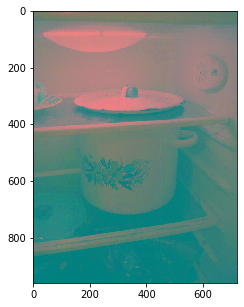

In [54]:
#EXTRA TASK COLOR DIFFERENCE
import math
import numpy as np
import cv2 
import matplotlib.pyplot as plt

img=cv2.imread("./examples/fridge.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_LAB=cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
print("img=",img[0:10,0:10,:])
print("img_LAB=",img_LAB[0:10,0:10,:])
px_1=img_LAB[200,200,:]
px_2=img_LAB[800,350,:]
px1=img[200,200,:]
px2=img[800,350,:]
print(px_1)
print(px1,px2)
def CIE76(px1,px2):
    E=math.sqrt(((px2[0]-px1[0])**2) + ((px2[1]-px1[1])**2) + ((px2[2]-px1[2])**2))
    return E
plt.figure(figsize=(5,5))
plt.imshow(img_LAB)
E=CIE76(px_1,px_2)
print("E=",E)

[[[255   0   0]
  [  0   0   0]
  [  0   0   0]]]
[[[135 222 173]
  [  0  96 136]
  [  0  96 136]]]


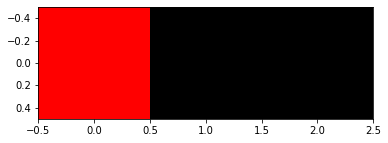

In [72]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

a=np.zeros((1,3,3),dtype='uint8')
a[0,0,0]=255
a[0,0,1]=0
a[0,0,2]=0
plt.figure()
plt.imshow(a)
print(a)
type(a)
b=cv2.cvtColor(a,cv2.COLOR_RGB2LUV)
print(b)